<a href="https://colab.research.google.com/github/24zuli/NLP/blob/main/Tutorial2_DL4NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple DNN

![image](https://matthewmazur.files.wordpress.com/2018/03/neural_network-9.png)

# Activation Functions

# Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Sigmoid activation function

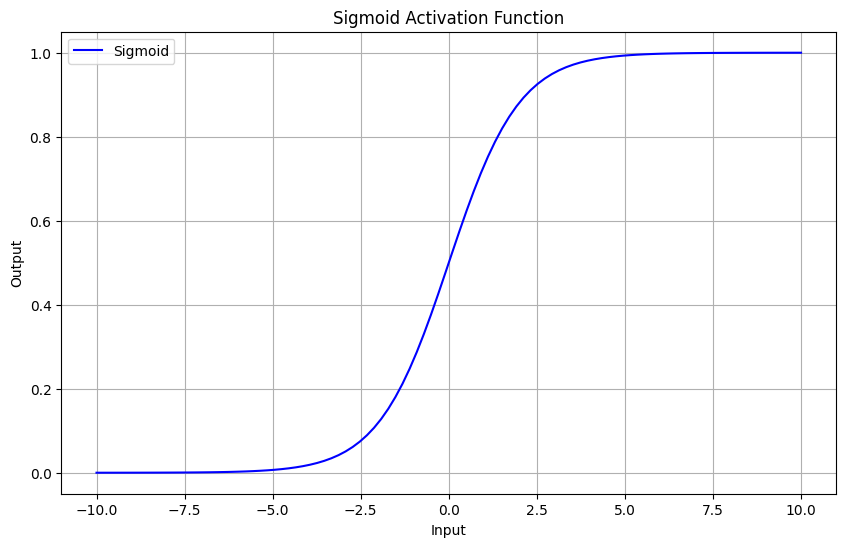

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label="Sigmoid", color="blue")
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()

# Tanh Activation FUnction

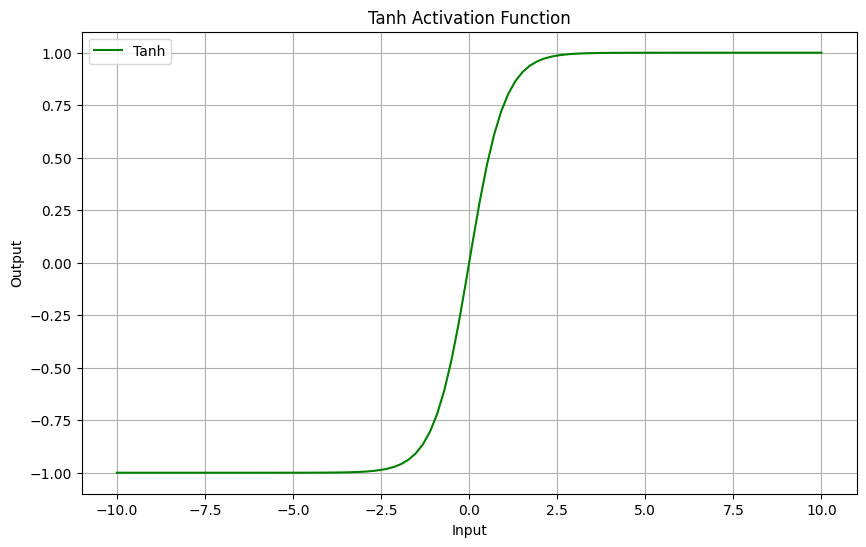

In [3]:
# --- Heading 2: Tanh Function ---

def tanh(x):
    return np.tanh(x)

y_tanh = tanh(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_tanh, label="Tanh", color="green")
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()

# Relu Activation Function

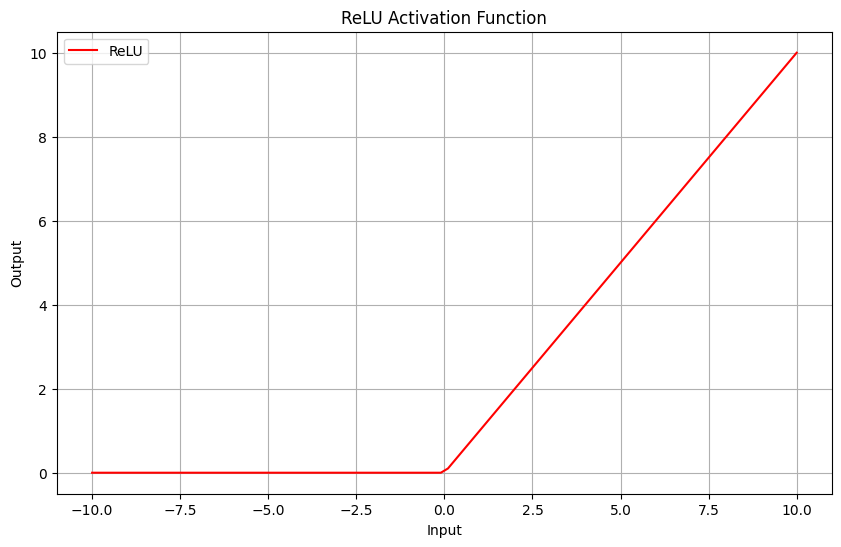

In [4]:
# --- Heading 3: ReLU Function ---

def relu(x):
    return np.maximum(0, x)

y_relu = relu(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_relu, label="ReLU", color="red")
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()

# Leaky Relu Activation Function

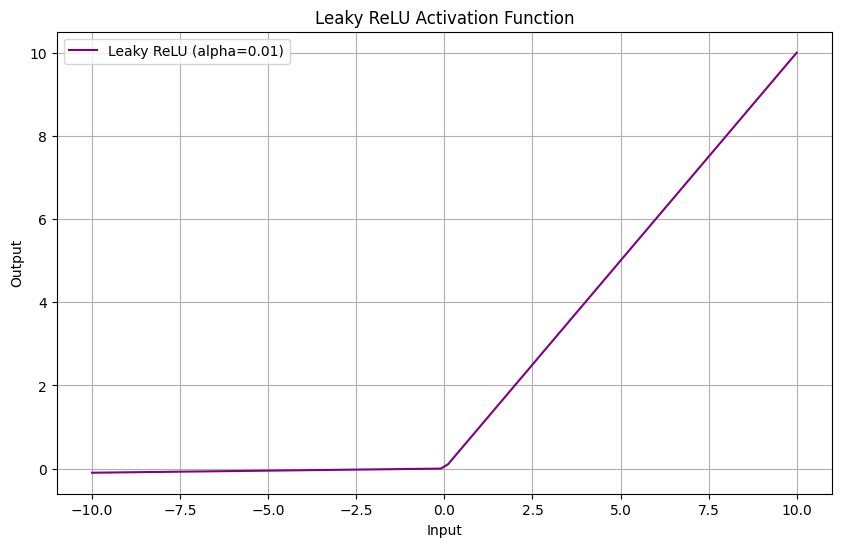

In [5]:
# --- Heading 4: Leaky ReLU Function ---

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

alpha = 0.01
y_leaky_relu = leaky_relu(x, alpha)

plt.figure(figsize=(10, 6))
plt.plot(x, y_leaky_relu, label=f"Leaky ReLU (alpha={alpha})", color="purple")
plt.title("Leaky ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()

# Softmax Activation Function

Softmax Input: [1. 2. 3. 4.]
Softmax Output: [3.77029476e-10 4.61436094e-10 5.64739054e-10 6.91168729e-10
 8.45902561e-10 1.03527708e-09 1.26704739e-09 1.55070475e-09
 1.89786526e-09 2.32274554e-09 2.84274493e-09 3.47915801e-09
 4.25804662e-09 5.21130715e-09 6.37797672e-09 7.80583179e-09
 9.55334469e-09 1.16920781e-08 1.43096155e-08 1.75131483e-08
 2.14338646e-08 2.62323225e-08 3.21050242e-08 3.92924637e-08
 4.80889749e-08 5.88547851e-08 7.20307667e-08 8.81564912e-08
 1.07892326e-07 1.32046476e-07 1.61608081e-07 1.97787724e-07
 2.42067002e-07 2.96259203e-07 3.62583560e-07 4.43756133e-07
 5.43101031e-07 6.64686542e-07 8.13491735e-07 9.95610352e-07
 1.21850036e-06 1.49128937e-06 1.82514839e-06 2.23374935e-06
 2.73382492e-06 3.34585378e-06 4.09489921e-06 5.01163548e-06
 6.13360401e-06 7.50675071e-06 9.18730750e-06 1.12440951e-05
 1.37613414e-05 1.68421305e-05 2.06126243e-05 2.52272289e-05
 3.08749175e-05 3.77869697e-05 4.62464418e-05 5.65997592e-05
 6.92709019e-05 8.47787680e-05 1.0375842

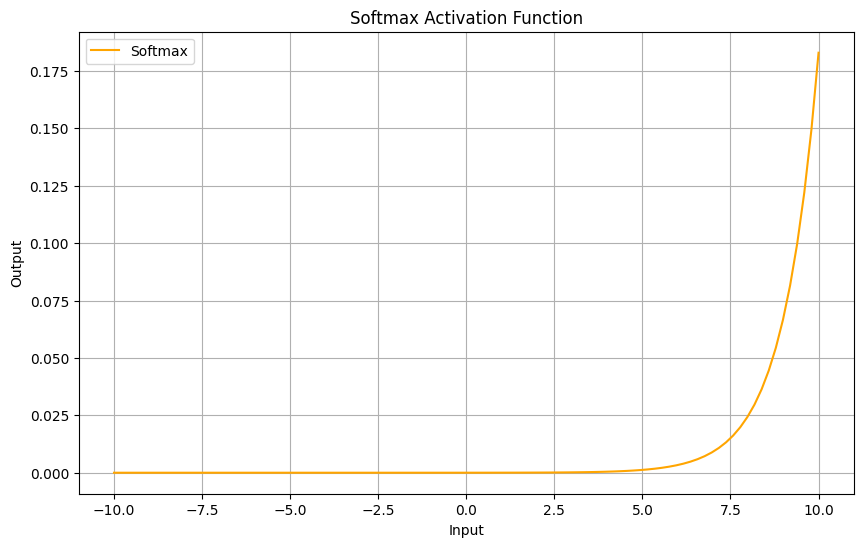

In [6]:
# --- Heading 5: Softmax Function ---

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / exp_x.sum(axis=0)

x_softmax = np.array([1.0, 2.0, 3.0, 4.0])
y_softmax = softmax(x)

print("Softmax Input:", x_softmax)
print("Softmax Output:", y_softmax)


plt.figure(figsize=(10, 6))
plt.plot(x, y_softmax, label=f"Softmax", color="orange")
plt.title("Softmax Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()




# Comparison of Activation Function

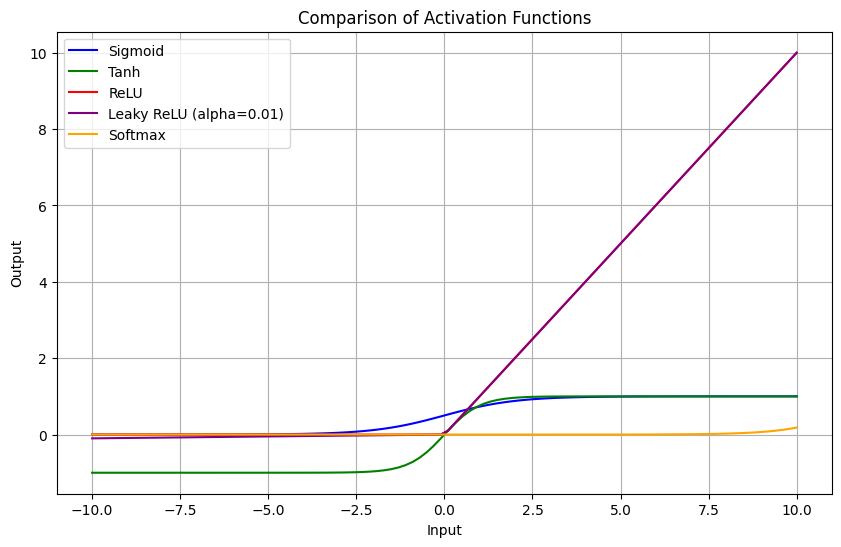

In [7]:
# --- Heading 6: Summary and Use Cases ---
# - **Sigmoid**: Used in binary classification tasks and as output in logistic regression.
# - **Tanh**: Centered at zero; useful for hidden layers in certain tasks.
# - **ReLU**: Default for hidden layers in deep neural networks due to simplicity and efficiency.
# - **Leaky ReLU**: Variant of ReLU; addresses the dying ReLU problem.
# - **Softmax**: Converts outputs to probabilities for multi-class classification.

# Plot all activation functions together for comparison
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label="Sigmoid", color="blue")
plt.plot(x, y_tanh, label="Tanh", color="green")
plt.plot(x, y_relu, label="ReLU", color="red")
plt.plot(x, y_leaky_relu, label=f"Leaky ReLU (alpha={alpha})", color="purple")
plt.plot(x, y_softmax, label=f"Softmax", color="orange")
plt.title("Comparison of Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()

#Understanding Gradient Descent

## Import Required Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Define Loss Function and Gradient

In [9]:
# Define a simple quadratic loss function: y = x^2
def loss_function(x):
    return x ** 2

# Derivative of the loss function: dy/dx = 2x
def gradient(x):
    return 2 * x

# Gardient Descent Formulae: new = old - learning rate * slope


## Gradient Descent Algorithm

In [10]:
# Gradient Descent Algorithm
def gradient_descent(starting_point, learning_rate, iterations):
    x = starting_point  # Initial value
    history = []        # To store x values and corresponding loss

    for i in range(iterations):
        loss = loss_function(x)
        grad = gradient(x)
        history.append((x, loss))

        print(f"Iteration {i+1}: x = {x:.4f}, Loss = {loss:.4f}, Gradient = {grad:.4f}")

        # Update x using gradient descent formula
        x -= learning_rate * grad

    return history

## Parameters for Gradient Descent

In [11]:
starting_point = 10  # Starting point for x
learning_rate = 0.08 # Step size for gradient descent
iterations = 300      # Number of iterations

## Run Gradient Descent

In [12]:
history = gradient_descent(starting_point, learning_rate, iterations)

Iteration 1: x = 10.0000, Loss = 100.0000, Gradient = 20.0000
Iteration 2: x = 8.4000, Loss = 70.5600, Gradient = 16.8000
Iteration 3: x = 7.0560, Loss = 49.7871, Gradient = 14.1120
Iteration 4: x = 5.9270, Loss = 35.1298, Gradient = 11.8541
Iteration 5: x = 4.9787, Loss = 24.7876, Gradient = 9.9574
Iteration 6: x = 4.1821, Loss = 17.4901, Gradient = 8.3642
Iteration 7: x = 3.5130, Loss = 12.3410, Gradient = 7.0260
Iteration 8: x = 2.9509, Loss = 8.7078, Gradient = 5.9018
Iteration 9: x = 2.4788, Loss = 6.1442, Gradient = 4.9575
Iteration 10: x = 2.0822, Loss = 4.3354, Gradient = 4.1643
Iteration 11: x = 1.7490, Loss = 3.0590, Gradient = 3.4980
Iteration 12: x = 1.4692, Loss = 2.1585, Gradient = 2.9383
Iteration 13: x = 1.2341, Loss = 1.5230, Gradient = 2.4682
Iteration 14: x = 1.0366, Loss = 1.0746, Gradient = 2.0733
Iteration 15: x = 0.8708, Loss = 0.7583, Gradient = 1.7416
Iteration 16: x = 0.7315, Loss = 0.5350, Gradient = 1.4629
Iteration 17: x = 0.6144, Loss = 0.3775, Gradient = 

## Visualization of Gradient Descent

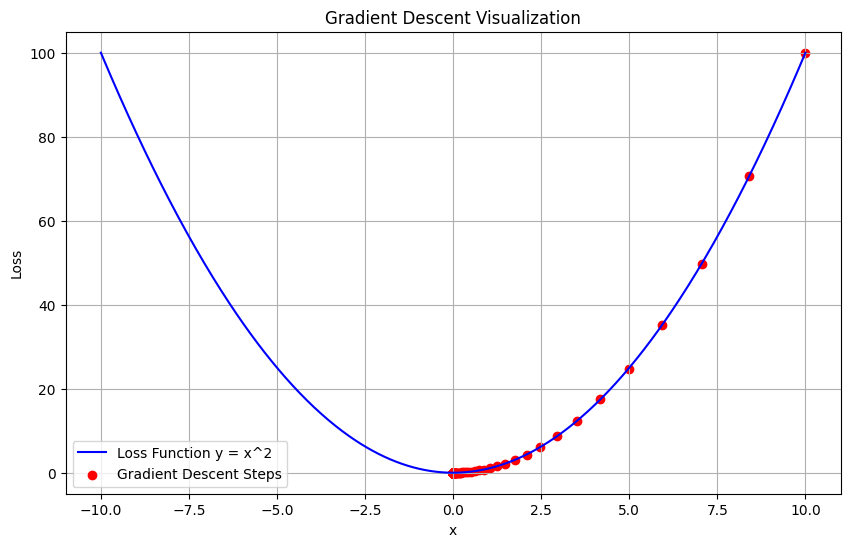

In [13]:
# Extract x and loss values for plotting
x_values, loss_values = zip(*history)

# Plotting the Loss Function
x_plot = np.linspace(-10, 10, 500)
y_plot = loss_function(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Loss Function y = x^2', color='blue')
plt.scatter(x_values, loss_values, color='red', label='Gradient Descent Steps')
plt.title('Gradient Descent Visualization')
plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

- [Source_blog](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)

## Simple DNN

![image](https://matthewmazur.files.wordpress.com/2018/03/neural_network-9.png)

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy
from sklearn import datasets

In [15]:
??nn.Linear

In [16]:
m = nn.Linear(20, 30)

In [17]:
nn.Linear

torch.nn.modules.linear.Linear

## Simple Perceptron

![image](https://matthewmazur.files.wordpress.com/2018/03/neural_network-9.png)

In [18]:
m = nn.Linear(2, 3)
input = torch.randn(3, 2)
output = m(input)


In [19]:
input

tensor([[ 0.5243, -0.2625],
        [-1.0741,  0.9899],
        [-0.1557,  2.2918]])

In [20]:
output

tensor([[ 0.1923,  0.0943,  0.0667],
        [ 0.4676, -1.1526,  0.0791],
        [-0.7125, -1.8336, -0.5793]], grad_fn=<AddmmBackward0>)

In [21]:
output.shape

torch.Size([3, 3])

In [22]:
m.weight.data

tensor([[-0.5683, -0.5055],
        [ 0.2384, -0.6913],
        [-0.2601, -0.3221]])

In [23]:
m.bias.data

tensor([ 0.3576, -0.2121,  0.1185])

In [24]:
def init_weight(m):
    if type(m) in [nn.Conv2d,nn.Linear]:
        m.weight.data=torch.Tensor([[0.15,0.20],[0.25,0.30]])
        m.bias.data=torch.Tensor([0.35])

In [25]:
## Model Set Up
class Perceptron(nn.Module):
    def __init__(self,input_size,H1,output_size):
        super().__init__()

        self.linear=nn.Linear(input_size,H1)
        # manual weight initialization for input to hidden node [refer above image]
        self.linear.weight.data=torch.Tensor([[0.15,0.20],[0.25,0.30]])
        self.linear.bias.data=torch.Tensor([0.35])

        # manual weight initialization for input to hidden node [refer above image]
        self.linear2=nn.Linear(H1,output_size)
        self.linear2.weight.data=torch.Tensor([[0.40,0.45],[0.50,0.55]])
        self.linear2.bias.data=torch.Tensor([0.60])

    def forward(self,x, print_values=True):

        ## Actual Return after Sigmoid
        net_h = self.linear(x)
        out_h=torch.sigmoid(net_h)
        net_O = self.linear2(out_h)
        out_O = torch.sigmoid(net_O)

        if print_values:
            print("h1: {}, h2: {}".format(net_h[0], net_h[1]))
            print("out_h1: {}, out_h2: {}".format(out_h[0], out_h[1]))
            print("net_O1: {}, net_O2: {}".format(net_O[0], net_O[1]))
            print("out_O1: {}, out_O2: {}".format(out_O[0], out_O[1]))


        return (out_O)

## Unfold each epoch and check intermediate values


### Initial Weight of the model

In [26]:
model=Perceptron(2,2,1)
print (list(model.parameters()))

[Parameter containing:
tensor([[0.1500, 0.2000],
        [0.2500, 0.3000]], requires_grad=True), Parameter containing:
tensor([0.3500], requires_grad=True), Parameter containing:
tensor([[0.4000, 0.4500],
        [0.5000, 0.5500]], requires_grad=True), Parameter containing:
tensor([0.6000], requires_grad=True)]


### After 1 forward pass check hidden, output and loss

![image](blog_1.png)

In [27]:
model.forward(torch.Tensor([0.05,0.10]))

h1: 0.3774999976158142, h2: 0.39249998331069946
out_h1: 0.5932700037956238, out_h2: 0.5968843698501587
net_O1: 1.1059060096740723, net_O2: 1.224921464920044
out_O1: 0.751365065574646, out_O2: 0.7729284763336182


tensor([0.7514, 0.7729], grad_fn=<SigmoidBackward0>)

$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = \left( x_n - y_n \right)^2,$$

In [28]:
##??nn.MSELoss

In [29]:
??nn.MSELoss

In [30]:
model=Perceptron(2,2,2)
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.5)
output=model.forward(torch.Tensor([0.05,0.10]))
target=torch.Tensor([0.01,0.99])
loss=criterion(output,target)
print("total MSEerror: {}".format(loss.item()))

h1: 0.3774999976158142, h2: 0.39249998331069946
out_h1: 0.5932700037956238, out_h2: 0.5968843698501587
net_O1: 1.1059060096740723, net_O2: 1.224921464920044
out_O1: 0.751365065574646, out_O2: 0.7729284763336182
total MSEerror: 0.2983711063861847


### Backward pass

In [31]:
# set prev grad to zero
optimizer.zero_grad()

loss.backward()

optimizer.step()

print(list(model.parameters()))

[Parameter containing:
tensor([[0.1498, 0.1996],
        [0.2498, 0.2995]], requires_grad=True), Parameter containing:
tensor([0.3406], requires_grad=True), Parameter containing:
tensor([[0.3589, 0.4087],
        [0.5113, 0.5614]], requires_grad=True), Parameter containing:
tensor([0.5498], requires_grad=True)]


### 2nd Forward Pass

In [32]:
y_output = model.forward(torch.Tensor([0.05,0.10]))

h1: 0.36808234453201294, h2: 0.38307496905326843
out_h1: 0.5909954905509949, out_h2: 0.594614565372467
net_O1: 1.0049166679382324, net_O2: 1.1857755184173584
out_O1: 0.7320241332054138, out_O2: 0.7659847140312195


### 2nd Backward pass

In [33]:
loss=criterion(y_output,target)

optimizer.zero_grad()

loss.backward()

optimizer.step()

print(list(model.parameters()))

[Parameter containing:
tensor([[0.1496, 0.1992],
        [0.2495, 0.2991]], requires_grad=True), Parameter containing:
tensor([0.3327], requires_grad=True), Parameter containing:
tensor([[0.3171, 0.3666],
        [0.5232, 0.5733]], requires_grad=True), Parameter containing:
tensor([0.4991], requires_grad=True)]


## Reinitializing the model and looping over Epoch

In [34]:
model=Perceptron(2,2,2)
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.5)

input_x = torch.Tensor([0.05,0.10])
for i in range(200):
    y_output=model.forward(input_x)

    loss=criterion(y_output,target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i%10 == 0:
        print(f'Epoch: {i}, loss: {loss.item()}, output: {y_output}')
        print("="*60)

h1: 0.3774999976158142, h2: 0.39249998331069946
out_h1: 0.5932700037956238, out_h2: 0.5968843698501587
net_O1: 1.1059060096740723, net_O2: 1.224921464920044
out_O1: 0.751365065574646, out_O2: 0.7729284763336182
Epoch: 0, loss: 0.2983711063861847, output: tensor([0.7514, 0.7729], grad_fn=<SigmoidBackward0>)
h1: 0.36808234453201294, h2: 0.38307496905326843
out_h1: 0.5909954905509949, out_h2: 0.594614565372467
net_O1: 1.0049166679382324, net_O2: 1.1857755184173584
out_O1: 0.7320241332054138, out_O2: 0.7659847140312195
h1: 0.360114723443985, h2: 0.37509986758232117
out_h1: 0.5890681743621826, out_h2: 0.5926907062530518
net_O1: 0.9030864238739014, net_O2: 1.1470353603363037
out_O1: 0.7115833759307861, out_O2: 0.7589690089225769
h1: 0.35378366708755493, h2: 0.3687613606452942
out_h1: 0.5875347852706909, out_h2: 0.5911596417427063
net_O1: 0.8010352849960327, net_O2: 1.1092110872268677
out_O1: 0.6901959180831909, out_O2: 0.7519819736480713
h1: 0.349249929189682, h2: 0.3642202615737915
out_h1: 

**Note:** at Line 3 above, if we use `Adam` optimizer, it will learn faster in lesser epoch. For example, with Adam, only using 10 epochs, the model will learn the optimum weight

In [35]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.1798, 0.2596],
        [0.2793, 0.3585]], requires_grad=True), Parameter containing:
tensor([1.5313], requires_grad=True), Parameter containing:
tensor([[-1.3960, -1.3548],
        [ 1.7382,  1.7937]], requires_grad=True), Parameter containing:
tensor([-0.3141], requires_grad=True)]


## Prediction

In [36]:
print (model.forward(torch.Tensor([0.06,0.12])))

h1: 1.5732752084732056, h2: 1.591109275817871
out_h1: 0.828249990940094, out_h2: 0.8307720422744751
net_O1: -2.5958445072174072, net_O2: 2.615769624710083
out_O1: 0.06940633803606033, out_O2: 0.9318695664405823
tensor([0.0694, 0.9319], grad_fn=<SigmoidBackward0>)


## Checking gradients of the particular layer

In [37]:
import torchvision as vis

In [38]:
vis_models = vis.models


In [39]:
dir(vis_models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [40]:
print(model.linear.weight.grad)

tensor([[-8.5309e-05, -1.7062e-04],
        [-8.4821e-05, -1.6964e-04]])


In [41]:
print (model.linear2.weight.grad)

tensor([[ 0.0032,  0.0032],
        [-0.0031, -0.0031]])


In [42]:
print("DONE")

DONE


In [43]:
alex_net = vis_models.AlexNet()

In [44]:
alex_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 